DAY3_課題① Kickstarter Projects  
講師からいただいたアドバイスから以下を修正  
・RecallとPrecisionの意味を逆にとっていたので説明を修正  
・汎化誤差は分類問題ではMAEを使用しない。Accuracyなどを使用して再計測。  

DAY2までの残件  
・データをヒストグラムや散布図で書いて視覚化する。  
・L1正則化を使用してパラメータ数を減らす。  
・SVMにて最適解を探す。  
・ハイパーパラメータの探索  

DAY3で習った以下の内容を反映する。  
・特徴選択を適切に実施  
・木モデル(決定木、ランダムフォレスト、アダブースト)を適切に利用  
・ニューラルネットワークを適切に利用  
・DAY2後宿題提出時のモデルと精度を比較  

その他  
・最初の説明変数を成功率をもとに分類する。  
　これによりget_dummiesを使用しないので説明変数が増えない。  
  その代わり、最初に学習時の変換テーブルを持って置き、入力データを一回変換する処理が必要となる。  
　講師に確認したところOKとのこと。  


# まとめ

### ■DAY1 モデル作成と性能評価
データの読み込み  
不要そうなパラメータの削除  
目的変数のカテゴリを円グラフで確認して成功と失敗のみ抽出（中止なども失敗としてもいい）  
目的変数をカテゴリから0,1に置き換え  
get_dummiesでカテゴリ変数を数値化、変数の数が一気に増える。  
ロジスティック回帰で学習、変数の数が多いため学習に時間がかかる。  
性能評価  

### ■DAY1 終了時点での予測精度は以下  
対数尤度 = -14.240  
正答率（Accuracy） = 58.771%  
適合率（Precision） = 71.708%  
再現率（Recall） = 50.934%  
F1値（F1-score） = 59.562%  

### ■DAY2 標準化したデータでホールドアウト法  
訓練誤差　MAE = 0.354  
汎化誤差  MAE = 0.354  
訓練誤差と汎化誤差の値に差がないので過学習は起きていない。  
↑　分類問題ではMAEは使用しない、Accuracyで計測する。

### ■DAY2 標準化のみを行った結果は以下  
標準化を行うことで以下のように性能が上がった。  
対数尤度 = -14.240　⇒　-12.212  
正答率（Accuracy） = 58.771% ⇒ 64.644%  
適合率（Precision）= 71.708% ⇒ 66.667%  
再現率（Recall） = 50.934% ⇒ 81.378%  
F1値（F1-score） = 59.562% ⇒ 73.292%   
AccuracyとRecallが上がって、Precisionが少し下がった。  

投資目線で考えると  
Precision = 投資したプロジェクトの成功率  
Recall = 成功するプロジェクトの取りこぼしをしない率   
負けない投資をするのであればPrecisionが大きいほうが良い。  
ただ、投資金額は一律ではないので、大きい投資額のプロジェクトばかり予測を外していたら損をする。  
この辺りはリスク回避で外れ値となるような大きい金額のプロジェクトは失敗と最初から予測するなど必要かもしれない。   成功したプロジェクトのリターン率が高いのであればRecallが大きいほうがいい。

資金には限りがあるので、Precisionが大きくなるようにモデルを作成したい。

### ■DAY2 残件  
L1正則化を使用してパラメータ数を減らす。  
SVMにて最適解を探す。  
汎化誤差がうまく出ていないのを直す。  

## ■DAY3 各検証結果
1.特徴選択せず、ロジスティック回帰  
  標準化なし  
  All parameter Accuracy =  0.5716  
  標準化あり  
  Standard parameter Accuracy =  0.6675      
 
2.ステップワイズ法による特徴選択(ランダムフォレスト)後に、ロジスティック回帰  
　Select parameter Accuracy =  0.646

3.LASSOによる特徴選択後に、ロジスティック回帰  
　Lasso parameter Accuracy =  0.6582  

4.決定木(Descision_tree)の学習結果  
  Descision tree Accuracy =  0.6514  

5.ランダムフォレスト(Random_Forest)の学習結果  
  Random Forest Accuracy =  0.6401  
  
6.アダブースト（AdaBoost）の学習結果  
  AdaBoost Accuracy =  0.6777  
  
7.ニューラルネットワークの学習結果  
　NNModel Accuracy =  [5.800, 0.6401]


以上の結果から、6がDAY2の結果より良くなった。  
6のアダブーストは計算も早く、特に深く考えなくてもいい成果が出た。  

2のステップワイズ法はいろいろなモデルを使って特徴選択ができるので、  
ランダムフォレストより精度のいいアダブーストを使用した場合も出してみたかった。  


## DAY3の内容のみ記述

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [3]:
#正則化用のライブラリ
from sklearn.linear_model import LinearRegression #線形回帰のライブラリ
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
#ホールドアウト法
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数from IPython.display import display

In [5]:
#標準化
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
#特徴選択(埋め込み法)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

## 1. データの読み込み
課題① Kickstarter Projects

In [7]:
df_kick = pd.read_csv("../../DAY5/4_kadai/kickstarter-projects/ks-projects-201801.csv")

## 読み込んだデータの前処理を関数化

In [8]:
def BeforeDataProcess(df_before):
    #欠損値のある行を削除
    df_before = df_before.dropna(how='any')
    
    #不要そうな項目を削除
    df_before = df_before.drop("ID", axis=1)
    df_before = df_before.drop("name", axis=1)
    df_before = df_before.drop("category", axis=1)
    
    #プロジェクトスタート後にわかる説明変数は削除
    df_before = df_before.drop("pledged", axis=1)
    df_before = df_before.drop("backers", axis=1)
    df_before = df_before.drop("usd pledged", axis=1)
    df_before = df_before.drop("usd_pledged_real", axis=1)
    
    #goalとusd_goalは同じ数字を変換しただけのもの。単位がそろっているほうがいいのでgoalは使用しない。
    df_before = df_before.drop("goal", axis=1)
    
    #開始日、終了日から期間を求める。
    df_before['deadline'] = pd.to_datetime(df_before['deadline'], errors = 'coerce')
    df_before['launched'] = pd.to_datetime(df_before['launched'], errors = 'coerce')
    df_before['period'] = (df_before['deadline'] - df_before['launched']).dt.days
    
    #不要になったdeadlineとlaunchedの列を削除します。
    df_before = df_before.drop(['deadline', 'launched'], axis=1)
    return df_before

In [9]:
df_kick_status = BeforeDataProcess(df_kick)

## 共通のホールドアウト法

データを分けた後に学習用とテスト用データそれぞれにget_dummieをすると、変数の数が合わなくならないか？

In [10]:
df_kick_status = df_kick_status[df_kick_status["state"]!="live"]
df_kick_status["state"] = df_kick_status["state"]=="successful"

#カテゴリデータのダミー数値化
df_kick_status = pd.get_dummies(df_kick_status)

X = df_kick_status.drop('state', axis=1).values
y = df_kick_status["state"].values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

## 特徴選択をする前の評価
まずはすべての変数でロジスティック回帰モデルで学習した場合のAccuracy

In [11]:
# 学習用データを使ってロジスティック回帰モデルを学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_test = clf.predict(X_test)

# テストデータに対するAccuracyを評価
Accuracy_All_parameter =  accuracy_score(y_test, y_pred_test)
print("All parameter Accuracy = ", Accuracy_All_parameter)

All parameter Accuracy =  0.5716474271968608


標準化あり

In [23]:

#標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.fit_transform(X_test)


# 学習用データを使ってロジスティック回帰モデルを学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X_train_stand, y_train)

# 学習用データに対する予測を実行
y_pred_test = clf.predict(X_test_stand)

# テストデータに対するAccuracyを評価
Accuracy_Standard_parameter =  accuracy_score(y_test, y_pred_test)
print("Standard parameter Accuracy = ", Accuracy_Standard_parameter)

Standard parameter Accuracy =  0.667571526480588


## フィルタ法による特徴選択

## ステップワイズ法による特徴選択

説明変数の数が多かったせいで、処理が終わらなかった。  
データ数を少なくするか、変数数を減らしたうえで再実行予定  
↑変数を減らす目的の処理が変数が多すぎて終わらない・・・  
↑モデルをロジスティック回帰からランダムフォレストに変更してみる  

Feature ranking: 
[39 28 26 20 16 10 19  8 13  1 14 22  1 35 29 21  1 31  5 42 41 30 43 45
 47 49 50 48 46 44 37 40 38 34 27 25  6 18 12  9  3 11 32  2 15 23 33 24
 36  7 17  4  1]


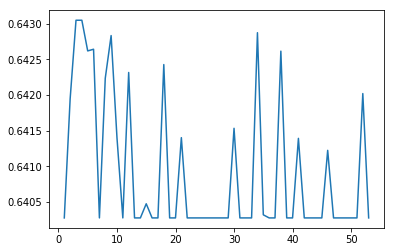

In [12]:
from sklearn.feature_selection import RFECV

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# estimatorにランダムフォレストのモデルをセット 処理時間早いモデルを使用
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は分類なのでaccuracyを評価指標に指定
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
rfecv = RFECV(estimator=clf, step=1, scoring='accuracy')

# fitで特徴選択を実行
rfecv.fit(X_train, y_train)

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# Accuracyが評価基準になっており，値が大きいほど汎化誤差は小さい
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

# bool型の配列に ~ をつけるとTrueとFalseを反転させることができる
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

# 削除してもよい特徴の名前を取得する
remove_feature = pd.DataFrame(X_train).columns[remove_idx]

# drop関数で特徴を削除
selected_X_train = pd.DataFrame(X_train).drop(remove_feature, axis=1).values

In [14]:
# 特徴選択後の学習用データを使ってロジスティック回帰モデルを学習
clf_sel = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf_sel.fit(selected_X_train, y_train)

# テスト用データに対する予測を実行
# drop関数で特徴を削除
selected_X_test = pd.DataFrame(X_test).drop(remove_feature, axis=1).values

y_pred_test = clf_sel.predict(selected_X_test)

# テストデータに対するAccuracyを評価
Accuracy_Select_parameter =  accuracy_score(y_test, y_pred_test)
print("Select parameter Accuracy = ", Accuracy_Select_parameter)

Select parameter Accuracy =  0.6462714848212006


## LASSOによる特徴選択

In [15]:
# estimatorにモデルをセット
# LassoCVを使って、正則化の強さは自動決定
estimator = LassoCV(normalize=True, cv=10)

# モデルの情報を使って特徴選択を行う場合は、SelectFromModelを使う
# 今回は係数が1e-5以下である特徴を削除する
# 係数のしきい値はthresholdで指定する
sfm = SelectFromModel(estimator, threshold=1e-5)

# fitで特徴選択を実行
sfm.fit(X_train, y_train)

# 削除すべき特徴の名前を取得 
removed_idx  = ~sfm.get_support()
#X_train.columns[removed_idx]

In [16]:
#特徴選択した変数で学習
drop_data_train = pd.DataFrame(X_train).drop(pd.DataFrame(X_train).columns[removed_idx], axis=1)
X_drop_train = drop_data_train.values

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X_drop_train, y_train)

# ラベルを予測
drop_data_test = pd.DataFrame(X_test).drop(pd.DataFrame(X_test).columns[removed_idx], axis=1)
X_drop_test = drop_data_test.values

y_test_pred = clf.predict(X_drop_test)

# テストデータに対するAccuracyを評価
Accuracy_Lasso_parameter =  accuracy_score(y_test, y_test_pred)
print("Lasso parameter Accuracy = ", Accuracy_Lasso_parameter)

Lasso parameter Accuracy =  0.6582989531399084


## 決定木(Descision_tree)の学習

score= 0.7536292747497891
[ True False False ... False False False]
[5.57051400e-01 2.00785690e-01 9.04443023e-03 1.49572270e-02
 6.35586069e-03 9.57988317e-03 1.09775295e-02 1.06742666e-02
 1.37202913e-02 7.79773178e-03 1.14632749e-02 3.41457217e-03
 2.47142107e-02 5.50142771e-03 8.83639743e-03 1.24651132e-02
 1.84453578e-02 2.83669707e-03 3.93567764e-03 2.70891927e-04
 3.25824360e-04 7.20749649e-03 6.95250527e-03 4.00340818e-04
 0.00000000e+00 6.50567015e-04 1.92982463e-04 5.23675856e-04
 6.42692338e-04 2.97702528e-04 1.14512861e-02 2.79143513e-04
 2.14567140e-03 4.55385433e-04 4.26284412e-03 1.26480091e-04
 2.15607153e-03 3.91260755e-04 1.49906818e-03 2.75589608e-03
 6.61649652e-03 4.40806322e-04 4.16705785e-04 1.41772760e-03
 0.00000000e+00 0.00000000e+00 1.11161429e-03 1.54803995e-03
 1.73676645e-04 2.77049275e-04 5.18032814e-04 1.90788932e-04
 1.17442363e-02]


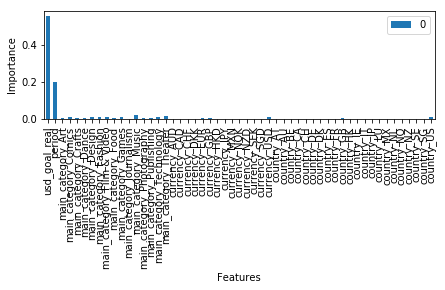

Descision tree Accuracy =  0.6514184349508823


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

print(clf.predict(X_test)) #予測したい場合

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=df_kick_status.drop('state', axis=1).columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# テストデータに対するAccuracyを評価
Accuracy_Descision_tree = clf.score(X_test, y_test)

print("Descision tree Accuracy = ", Accuracy_Descision_tree)

## ランダムフォレスト(Random_Forest)の学習

score= 0.6402742827961794
[2.59419224e-01 1.68218345e-01 1.56588323e-02 3.44843707e-02
 2.90839897e-02 6.81200247e-02 0.00000000e+00 4.85275199e-02
 0.00000000e+00 4.84889502e-02 0.00000000e+00 0.00000000e+00
 2.71958901e-02 0.00000000e+00 0.00000000e+00 9.41799061e-04
 9.81967265e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46635981e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21975788e-04 3.64532518e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.62881733e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.43070355e-02]


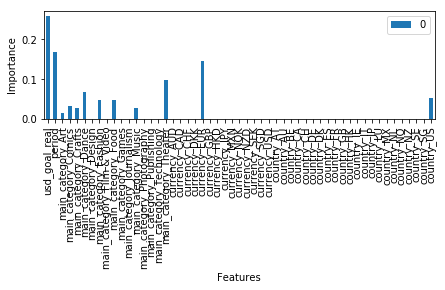

Random Forest Accuracy =  0.6401300847970113


In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=df_kick_status.drop('state', axis=1).columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# テストデータに対するAccuracyを評価
Accuracy_random_forest = clf.score(X_test, y_test)

print("Random Forest Accuracy = ", Accuracy_random_forest)

## アダブースト（AdaBoost）の学習

score= 0.6804726372337888
[0.30864543 0.20465845 0.         0.03175855 0.02714451 0.02667024
 0.0034019  0.03087173 0.01092378 0.03908745 0.03479659 0.02835861
 0.02277159 0.01505411 0.02073508 0.02639149 0.09034709 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02679792 0.         0.         0.         0.         0.
 0.         0.0010218  0.         0.01783682 0.01397776 0.
 0.         0.01807849 0.         0.         0.         0.
 0.         0.         0.         0.         0.00067062]


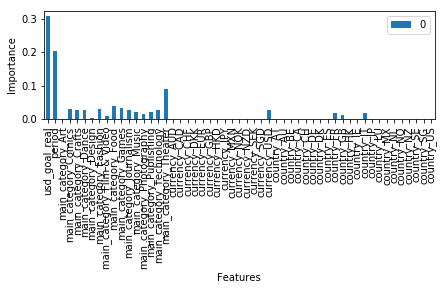

AdaBoost Accuracy =  0.6777713571553358


In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,
                                                                                 min_samples_leaf=2,
                                                                                 min_samples_split=2, 
                                                                                 random_state=1234,
                                                                                 criterion="gini"),
                                           n_estimators=10, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=df_kick_status.drop('state', axis=1).columns).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

# テストデータに対するAccuracyを評価
Accuracy_AdaBoost = clf.score(X_test, y_test)

print("AdaBoost Accuracy = ", Accuracy_AdaBoost)

## ニューラルネットワークの学習
kerasで解く

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=53))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(2, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
# adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

C:\Users\mat\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 297649 samples, validate on 74413 samples
Epoch 1/50
297649/297649 [==============================] - 11s 38us/step - loss: 5.7976 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 2/50
297649/297649 [==============================] - 11s 38us/step - loss: 5.7981 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 3/50
297649/297649 [==============================] - 11s 37us/step - loss: 5.7981 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 4/50
297649/297649 [==============================] - 11s 38us/step - loss: 5.7981 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 5/50
297649/297649 [==============================] - 11s 37us/step - loss: 5.7981 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 6/50
297649/297649 [==============================] - 11s 38us/step - loss: 5.7981 - acc: 0.6403 - val_loss: 5.8004 - val_acc: 0.6401
Epoch 7/50
297649/297649 [==============================] - 11s 38us/step - loss: 5.7981 - acc: 0.6403 - val_

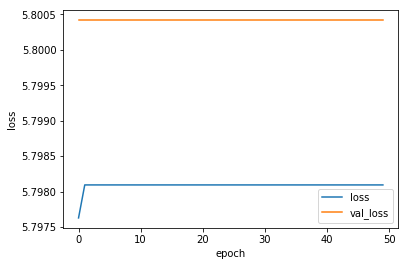

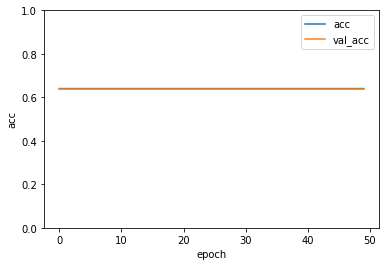

In [21]:
#計測開始
#startTime = time.time()

# one-hotベクトルに変換
from keras.utils import np_utils
y_train_one = np_utils.to_categorical(y_train)
y_test_one = np_utils.to_categorical(y_test)

# 計算の実行
fit = model.fit(X_train, y_train_one,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test_one))

# テストデータに対するAccuracyを評価
Accuracy_NNModel = model.evaluate(X_test, y_test_one, verbose=0)
print("NNModel Accuracy = ", Accuracy_NNModel)

#処理にかかった時間
#print("time:{0:.3f}sec".format(time.time() - startTime))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()